## Beschreibung der Aufgabe

In dieser Aufgabe implementieren Sie ein Programm, das lernt, Punkte in $\mathbb{R}^3$ zu klassifizieren.

### Aufgabe 1: Einlesen der Trainingsdaten

Verwenden Sie pandas, um den Datensatz `train.csv` in einen DataFrame `df` zu laden. Wenn Sie `df.head()` ausführen, erhalten Sie:

```
 	  x1 	x2 	x3 	y
0 	2.351230 	2.902232 	2.457985 	0.0
1 	3.076945 	2.834429 	1.834440 	0.0
2 	3.116672 	3.542658 	1.668031 	0.0
3 	2.383648 	2.672314 	1.670679 	0.0
4 	2.171093 	1.647107 	0.780299 	0.0
```

Jede Zeile stellt einen Punkt dar. Die letzte Spalte `y` ist eine Ganzzahl (0 oder 1), welche die Klasse repräsentiert. Alle anderen Spalten beschreiben die Koordinate des Punktes.

Anschliessend erstellen Sie zwei DataFrames `X` und `y`. Hierbei soll `y` nur die Labels enthalten und `X` alle anderen Spalten. Soweit ist alles bereits im Code vorhanden.

In [1]:
import pandas as pd
import numpy as np

# Hint: This one we already solved for you ;)
df = pd.read_csv("train.csv")  #make sure "train.csv" is located in the right place!

X = df.drop(['y'], axis=1)
y = df['y']

df.head()

,x1,x2,x3,y
0,2.351230,2.902232,2.457985,0.0
1,3.076945,2.834429,1.834440,0.0
2,3.116672,3.542658,1.668031,0.0
3,2.383648,2.672314,1.670679,0.0
4,2.171093,1.647107,0.780299,0.0


### Aufgabe 2: Datensatz aufteilen

Teilen Sie nun `(X, y)` mithilfe der Funktion `train_test_split` von Scikit in einen Trainingsdatensatz `(X_train, y_train)` und einen Testdatensatz `(X_test, y_test)` auf. Anhand dieser Daten werden Sie in den kommenden Schritten Ihr Modell trainieren bzw. validieren. Nutzen Sie 80% der Punkte in `(X, y)` zur Erzeugung der Trainingsdaten und 20% für die Testdaten. 

Bitte ändern Sie $\textcolor{red}{NICHT}$ den Aufruf der Funktion `np.random.seed` und spezifizieren Sie $\textcolor{red}{KEINEN}$`random_state` beim Aufteilen der Daten!

In [2]:
np.random.seed(42) #don't change!
from sklearn.model_selection import train_test_split

# Hint: this function takes as parameter X, y, and a 'test_size' ;)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

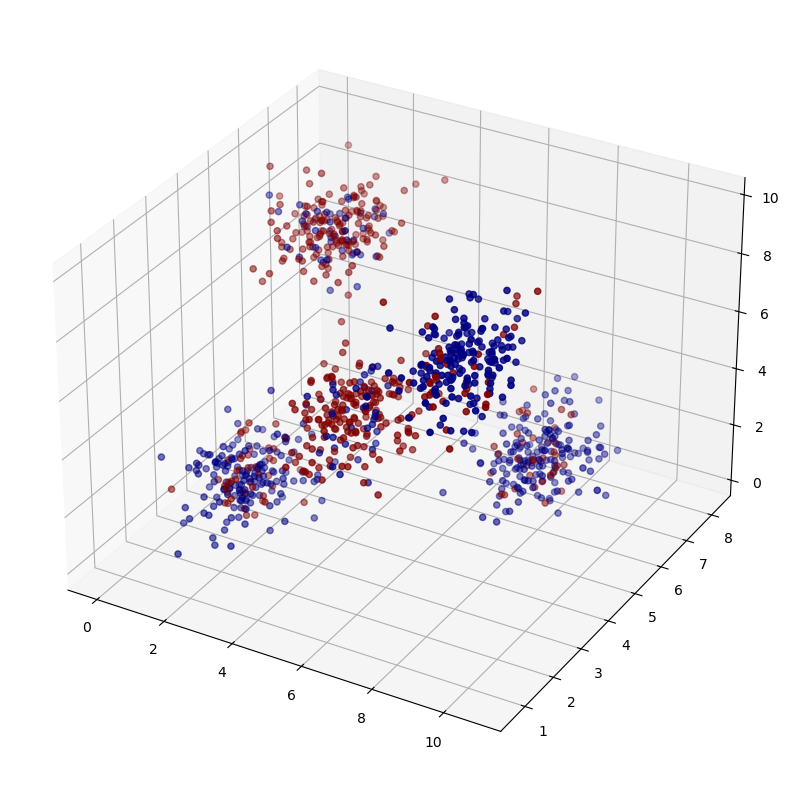

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X['x1'],X['x2'],X['x3'], c=y, cmap='jet')

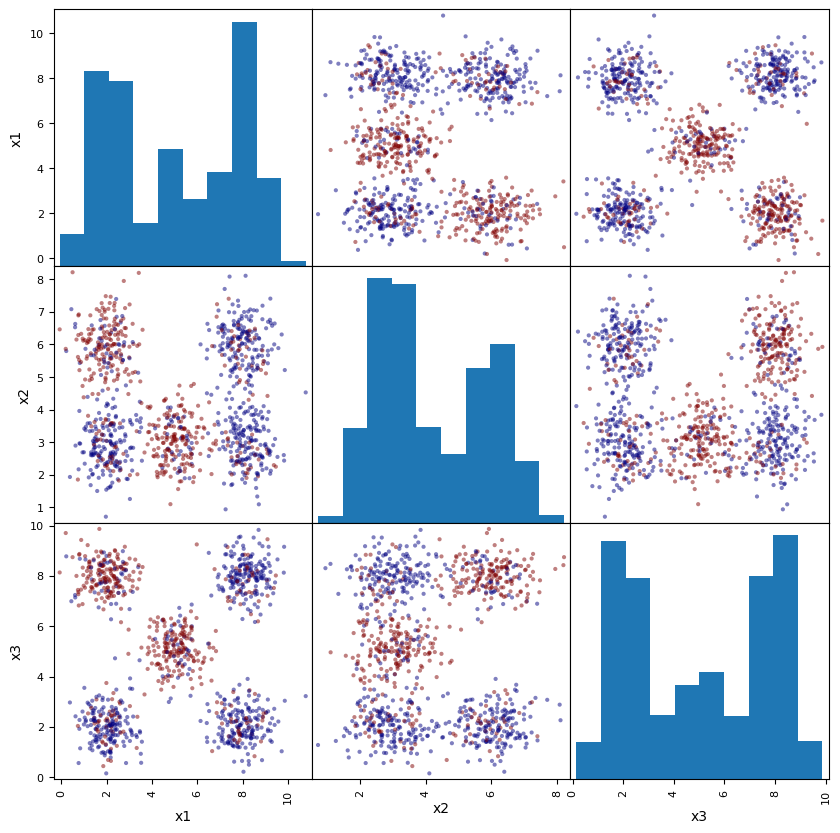

In [4]:
ax=pd.plotting.scatter_matrix(X,grid=True, c=y,cmap='jet',figsize=(10,10))


### Aufgabe 3: Modell auswählen und trainieren

Verwenden Sie `GridSearch` und das `DecisionTree` - Modell, um die Punkte in `X_test` zu klassifizieren, und erstellen Sie einen DataFrame `y_pred`, der die Vorhersagen des Schätzers für jeden Punkt in `X_test` enthält. Die Dokumentation zum `DecisionTree`-Modell finden Sie [hier](https://scikit-learn.org/stable/modules/tree.html).

Sie dürfen auch `GridSearch` benutzen, um den Parameter `max_depth` des `DecisionTrees` zu optimieren. Dieser Parameter ist eine Ganzzahl, die die Tiefe des Baumes bestimmt. Beachten Sie, dass je tiefer der Baum, desto komplexer wird er. Daher neigen tiefe Bäume mehr zu Overfitting.

37.0
{'max_depth': 2}


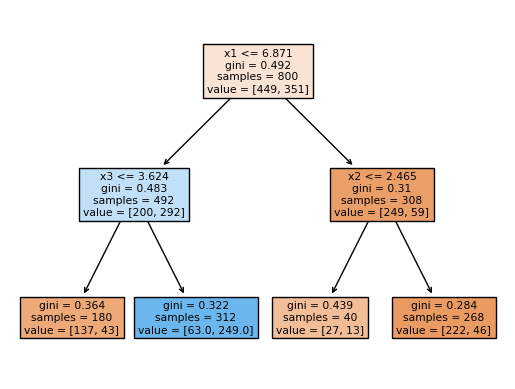

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

model = GridSearchCV(DecisionTreeClassifier(), param_grid={'max_depth':list(range(1,21))},scoring='accuracy').fit(X_train,y_train)
y_pred=model.predict(X_test)
print(np.sum(np.abs(y_pred-y_test)))
print(model.best_params_)
tree.plot_tree(model.best_estimator_, filled=True, feature_names=df.columns)
#print(model.best_estimator_.predict_proba(X_test))
pass



In [77]:
from sklearn.metrics import accuracy_score
for mdepth in range(1,10):
    mdl = DecisionTreeClassifier(max_depth=mdepth).fit(X_train,y_train)
    y_pred_train = mdl.predict(X_train)
    y_pred_test  = mdl.predict(X_test)
    y_pred_total = mdl.predict(X)
    print(mdepth,':',
          'score train %.5f' % accuracy_score(y_train,y_pred_train), 
          '| score test %.5f' % accuracy_score(y_test,y_pred_test),
          '| score total %.5f' % accuracy_score(y,y_pred_total))


1 : score train 0.67625 | score test 0.72500 | score total 0.68600
2 : score train 0.79375 | score test 0.81500 | score total 0.79800
3 : score train 0.80125 | score test 0.80000 | score total 0.80100
4 : score train 0.80750 | score test 0.79500 | score total 0.80500
5 : score train 0.81500 | score test 0.79500 | score total 0.81100
6 : score train 0.82625 | score test 0.77500 | score total 0.81600
7 : score train 0.84750 | score test 0.77000 | score total 0.83200
8 : score train 0.86000 | score test 0.78000 | score total 0.84400
9 : score train 0.87875 | score test 0.77000 | score total 0.85700


In [78]:
cv_res=cross_val_score(DecisionTreeClassifier(max_depth=2),X,y, cv=5, scoring='accuracy')
print(cv_res)

[0.755 0.825 0.805 0.775 0.82 ]


In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=10)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print(np.sum(np.abs(y_pred-y_test)))

36.0


### Aufgabe 4: Validierung

Bewerten Sie die Genauigkeit der vom Schätzer vorgenommenen Vorhersagen anhand von `y_test` als Grundlage. Verwenden Sie dafür die Funktion `accuracy_score` von Scikit. Dies dient Ihnen als Absicherung, dass Ihr Algorithmus funktioniert.

In [80]:
from sklearn.metrics import accuracy_score

# Hint: Here you use your estimator to 'predict' the labels for your
# test data.
y_pred = None

# Hint: Call accuracy_score with the following arguments:
# 1. the true labels.
# 2. the labels you predicted.
acc = None

print("Accuracy of estimator on test data: {:.3f}".format(acc))

TypeError: unsupported format string passed to NoneType.__format__

### Aufgabe 5: Bewertung

Verwenden Sie dann wiederum pandas, um den Datensatz `X_final.csv` in einen DataFrame `X_final` zu laden.

Beachten Sie, dass dies ein Datensatz ist, der Punkte beschreibt, ohne jedoch deren Labels anzugeben. Diese Labels sind vor Ihnen verborgen. Verwenden Sie Ihren Schätzer, um diese Punkte zu klassifizieren. Tragen Sie zuletzt Ihre Klassifizierung der Punkte in Moodle ein!

In [ ]:
X_final = pd.read_csv("X_final.csv")
X_final.head()

,x1,x2,x3
0,7,4,8
1,5,4,5
2,3,7,8
3,3,3,1
4,4,4,4


In [ ]:
y_final = model.best_estimator_.predict(X_final) #classify the points in X_final with the help of your DecisionTreeClassifier
y_final_proba = model.best_estimator_.predict_proba(X_final)
for i, y in enumerate(y_final.astype(int)):
    print(f"Der Punkt in der Reihe {i} ist vom Typ {y} mit Warscheinlichket %.1f%%" % (100.0*np.max(y_final_proba[i])))

Der Punkt in der Reihe 0 ist vom Typ 0 mit Warscheinlichket 82.8%
Der Punkt in der Reihe 1 ist vom Typ 1 mit Warscheinlichket 79.8%
Der Punkt in der Reihe 2 ist vom Typ 1 mit Warscheinlichket 79.8%
Der Punkt in der Reihe 3 ist vom Typ 0 mit Warscheinlichket 76.1%
Der Punkt in der Reihe 4 ist vom Typ 1 mit Warscheinlichket 79.8%
Der Punkt in der Reihe 5 ist vom Typ 1 mit Warscheinlichket 79.8%
Der Punkt in der Reihe 6 ist vom Typ 1 mit Warscheinlichket 79.8%
Der Punkt in der Reihe 7 ist vom Typ 1 mit Warscheinlichket 79.8%
Der Punkt in der Reihe 8 ist vom Typ 0 mit Warscheinlichket 82.8%
Der Punkt in der Reihe 9 ist vom Typ 0 mit Warscheinlichket 76.1%
